# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
 !pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.3 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=9202db4cf225bc81755d74606e5a16eae902b161ae99064466e4e6fef804842c
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
import os
kaggle_username = "jiyachawla04"
kaggle_key = "f9a54356ce53bf3415d03cc8a3639259"

# Save API token the kaggle.json file
kaggle_path=os.path.expanduser("~/.kaggle/kaggle.json")
with open(kaggle_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

In [3]:
!pip install kaggle

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train['datetime'] = pd.to_datetime(train['datetime'])
train_preprocessed=train.drop(columns=['casual','registered'])
train_preprocessed.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train_preprocessed.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
label='count'
ignored_columns=['casual','registered']
predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(train_preprocessed, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240509_135837"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240509_135837/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 189 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.103401  root_mean_squared_error      27.099331  418.831435                0.000856           0.038079            3       True         12
1   RandomForestMSE_BAG_L2  -53.450580  root_mean_squared_error      20.158340  310.207902                0.735079          47.968359            2       True         11
2          LightGBM_BAG_L2  -54.949409  root_mean_squared_error      19.847095  295.571666                0.423834          33.332123            2       True         10
3        LightGBMXT_BAG_L2  -60.521656  root_mean_squared_error      25.939563  337.492875                6.516302          75.253331            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.067132    0.050283   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.06478670175287,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [12]:
predictions=predictor.predict(test)
predictions.head()

0    23.334412
1    43.624111
2    46.470242
3    49.375183
4    52.339714
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions_description = predictions.describe()
print(predictions_description)

count    6493.000000
mean      100.520576
std        89.844521
min         2.905255
25%        19.684067
50%        64.134705
75%       167.310974
max       368.868774
Name: count, dtype: float64


In [14]:
# How many negative values do we have?
num_negative_values = (predictions < 0).sum()
print("Number of negative values:", num_negative_values)

Number of negative values: 0


In [15]:
# Set them to zero
predictions[predictions < 0] = 0


In [16]:
predictor.evaluate(train_preprocessed)

{'root_mean_squared_error': -77.46087076327208,
 'mean_squared_error': -6000.186499404339,
 'mean_absolute_error': -52.516611893300116,
 'r2': 0.8171249058044472,
 'pearsonr': 0.9394865332161484,
 'median_absolute_error': -30.552766799926758}

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 821kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-09 14:16:02  first raw submission               complete  1.80223      1.80223       
submission_new_hpo.csv       2024-05-08 21:23:00  new features with hyperparameters  complete  0.51037      0.51037       
submission_new_features.csv  2024-05-08 20:29:41  new features                       complete  0.50798      0.50798       
submission.csv               2024-05-08 20:23:00  first raw submission               complete  1.80251      1.80251       


Initial score of `1.80223`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

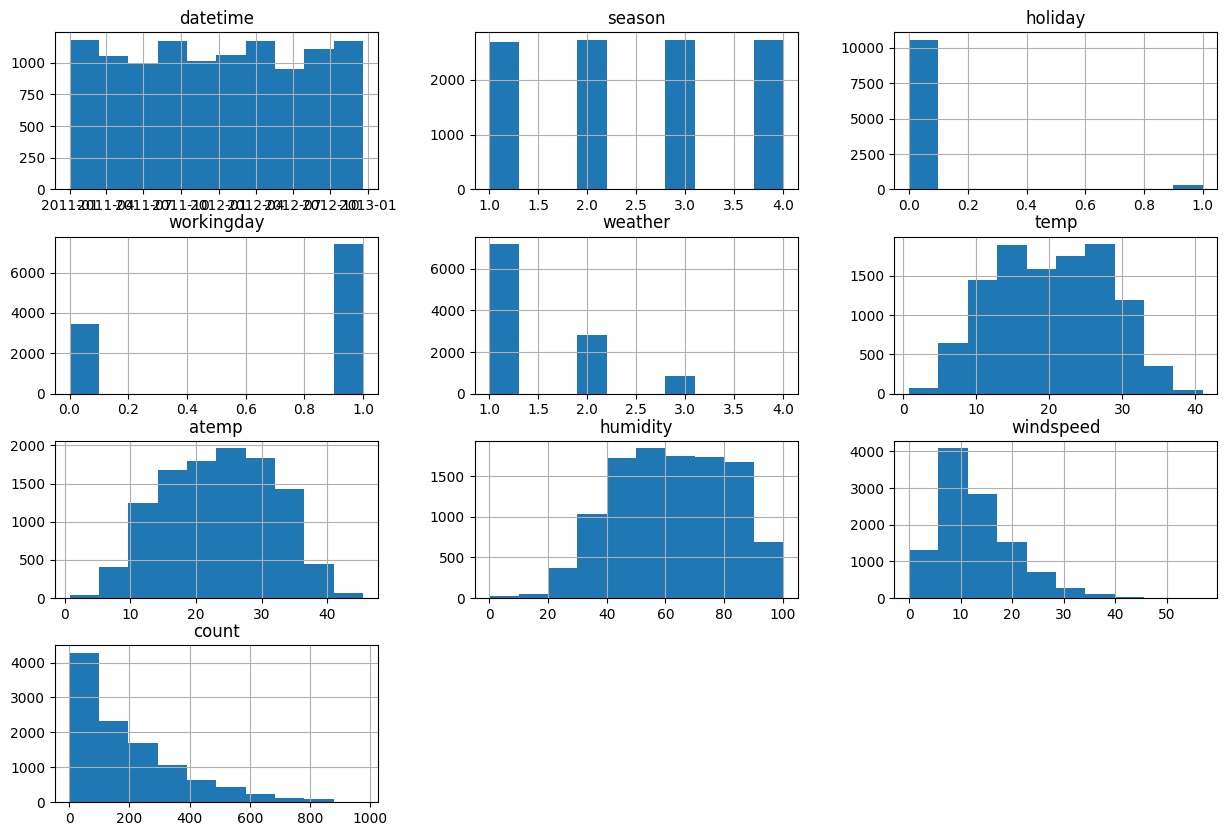

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train_preprocessed.hist(figsize=(15, 10))
#plt.tight_layout()
plt.show()

In [21]:
# create a new feature
train_preprocessed['hour']=train['datetime'].dt.hour
train_preprocessed['day']=train['datetime'].dt.day
train_preprocessed['month']=train['datetime'].dt.month

test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [22]:
train_preprocessed["season"] = train_preprocessed['season'].astype('category')
train_preprocessed["weather"] = train_preprocessed['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

In [23]:
# View are new feature
train_preprocessed.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


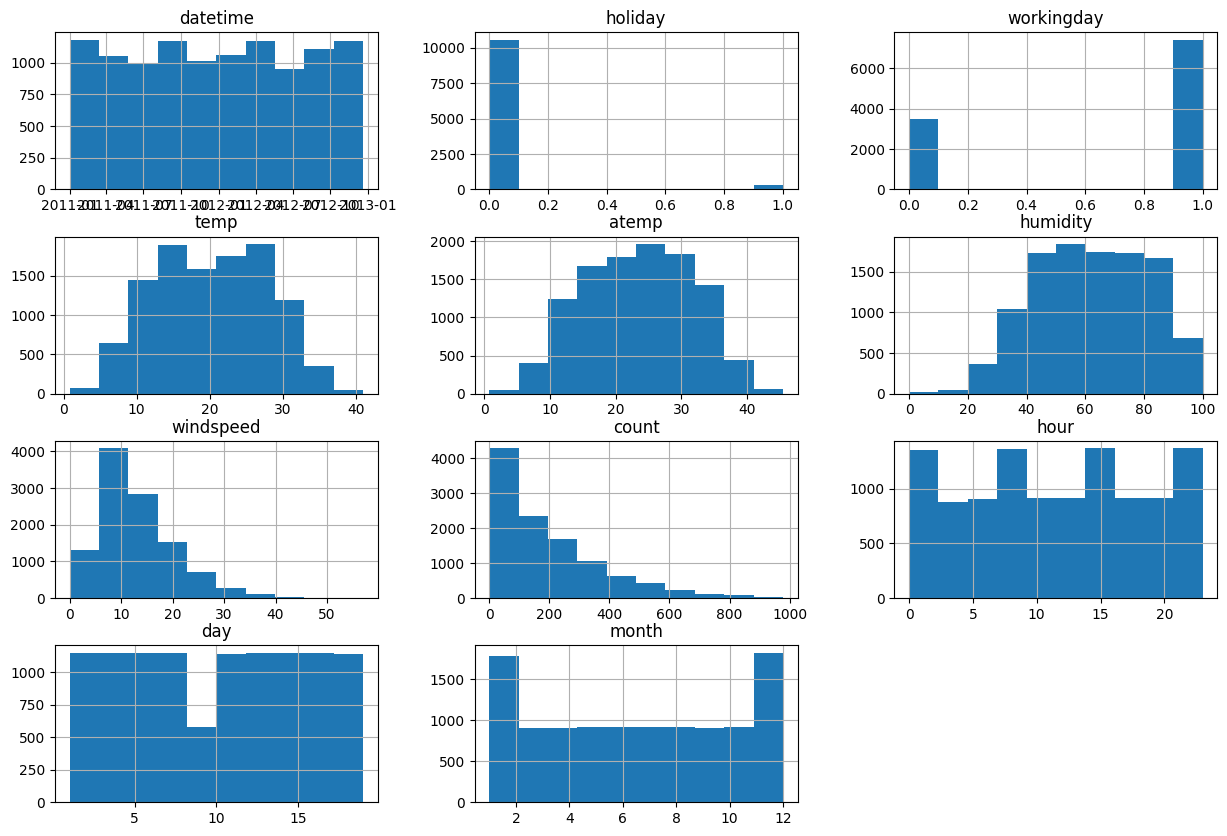

In [24]:
# View histogram of all features again now with the hour feature
train_preprocessed.hist(figsize=(15, 10))
#plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
predictor_new_features = TabularPredictor(label=label).fit(train_preprocessed)


No path specified. Models will be saved in: "AutogluonModels/ag-20240509_141700"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240509_141700"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

[1000]	valid_set's rmse: 37.6349
[2000]	valid_set's rmse: 36.1598
[3000]	valid_set's rmse: 35.7938
[4000]	valid_set's rmse: 35.7715


	-35.7524	 = Validation score   (-root_mean_squared_error)
	8.56s	 = Training   runtime
	0.66s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 35.2001


	-35.1312	 = Validation score   (-root_mean_squared_error)
	1.92s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-38.5963	 = Validation score   (-root_mean_squared_error)
	18.69s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: CatBoost ...
	-35.0591	 = Validation score   (-root_mean_squared_error)
	217.37s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-40.3635	 = Validation score   (-root_mean_squared_error)
	10.17s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-46.2806	 = Validation score   (-root_mean_squared_error)
	17.97s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	-35.2541	 = Validation score   (-root_mean_squared_error)
	4.4s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-39.362	 = Validation score   (-root_mean_squared_error)
	117.39s	 = Training   runtime
	0.02s	 = Vali

[1000]	valid_set's rmse: 33.751


	-33.7289	 = Validation score   (-root_mean_squared_error)
	3.96s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.458, 'XGBoost': 0.167, 'NeuralNetTorch': 0.167, 'LightGBMXT': 0.125, 'CatBoost': 0.042, 'NeuralNetFastAI': 0.042}
	-32.426	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 409.02s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240509_141700")


In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -32.426006  root_mean_squared_error       1.298947  369.699926                0.000905           0.052180            2       True         12
1         LightGBMLarge  -33.728896  root_mean_squared_error       0.220809    3.956969                0.220809           3.956969            1       True         11
2              CatBoost  -35.059087  root_mean_squared_error       0.035382  217.371113                0.035382         217.371113            1       True          6
3              LightGBM  -35.131237  root_mean_squared_error       0.126906    1.921029                0.126906           1.921029            1       True          4
4               XGBoost  -35.254127  root_mean_squared_error       0.317584    4.400765                0.317

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -35.7524199786944,
  'LightGBM': -35.13123727917639,
  'RandomForestMSE': -38.59631257825586,
  'CatBoost': -35.059087413752565,
  'ExtraTreesMSE': -40.36354342517197,
  'NeuralNetFastAI': -46.28059018312641,
  'XGBoost': -35.254127337363094,
  'NeuralNetTorch': -39.361971181829766,
  'LightGBMLarge': -33.72889571724481,
  'WeightedEnsemble_L2': -32.42600634352505},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeigh

In [27]:
predictions_new=predictor_new_features.predict(test)
# Remember to set all negative values to zero
predictions_new[predictions_new < 0] = 0

(predictions_new < 0).sum()


0

In [28]:
predictor_new_features.evaluate(train_preprocessed)

{'root_mean_squared_error': -15.907904458543491,
 'mean_squared_error': -253.0614242621479,
 'mean_absolute_error': -9.927095421170533,
 'r2': 0.9922871344409385,
 'pearsonr': 0.9961715581041863,
 'median_absolute_error': -6.265937805175781}

In [29]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"]=predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 662kB/s]
Successfully submitted to Bike Sharing Demand

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-09 14:25:24  new features                       complete  0.51683      0.51683       
submission.csv               2024-05-09 14:16:02  first raw submission               complete  1.80223      1.80223       
submission_new_hpo.csv       2024-05-08 21:23:00  new features with hyperparameters  complete  0.51037      0.51037       
submission_new_features.csv  2024-05-08 20:29:41  new features                       complete  0.50798      0.50798       




```
# This is formatted as code
```

#### New Score of `0.51683`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [34]:
from autogluon.tabular import TabularPredictor

# Define hyperparameters
hyperparameters = {
    'GBM': [{'reg_lambda': 0.0}, {'reg_lambda': 0.1}, {'reg_lambda': 0.2},
            {'reg_lambda': 0.9}, {'reg_lambda': 0.8}, {'reg_alpha': 0.0}],
    'CAT': [{'depth': 6}, {'depth': 4}, {'depth': 5}],
    'XGB': [{'eta': 0.2}, {'eta': 0.1}, {'eta': 0.3}],
}
hyperparameter_tune_kwargs = {
    'searcher': 'random',  # Specify the hyperparameter search algorithm (e.g., random, grid, bayesopt, skopt)
    'num_trials': 100,  # Maximum number of hyperparameter combinations to evaluate
    'num_folds': 5,  # Number of folds for cross-validation during hyperparameter tuning
    'scheduler': 'local',
}
# Fit the model with simplified tuning configuration
predictor_new_hpo = TabularPredictor(label=label, eval_metric='root_mean_squared_error')
predictor_new_hpo.fit(train_preprocessed, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, time_limit=1200, presets='best_quality')


No path specified. Models will be saved in: "AutogluonModels/ag-20240509_143153"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240509_143153/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 468 second

  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-33.984	 = Validation score   (-root_mean_squared_error)
	61.94s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_2_BAG_L1 ... Tuning model for up to 36.52s of the 668.47s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_2_BAG_L1/T1 ...
	-33.9728	 = Validation score   (-root_mean_squared_error)
	59.4s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_3_BAG_L1 ... Tuning model for up to 36.52s of the 608.93s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_3_BAG_L1/T1 ...
	-33.8079	 = Validation score   (-root_mean_squared_error)
	64.03s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_4_BAG_L1 ... Tuning model for up to 36.52s of the 544.81s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_4_BAG_L1/T1 ...
	-33.9046	 = Validation score   (-root_mean_squared_error)
	64.54s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_5_BAG_L1 ... Tuning model for up to 36.52s of the 480.14s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_5_BAG_L1/T1 ...
	-34.0361	 = Validation score   (-root_mean_squared_error)
	66.8s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_6_BAG_L1 ... Tuning model for up to 36.52s of the 413.19s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_6_BAG_L1/T1 ...
	-33.9246	 = Validation score   (-root_mean_squared_error)
	62.51s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 36.52s of the 350.56s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-41.0898	 = Validation score   (-root_mean_squared_error)
	46.13s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_2_BAG_L1 ... Tuning model for up to 36.52s of the 304.34s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.06%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_2_BAG_L1/T1 ...
	-48.4564	 = Validation score   (-root_mean_squared_error)
	45.92s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_3_BAG_L1 ... Tuning model for up to 36.52s of the 258.31s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_3_BAG_L1/T1 ...
	-43.8349	 = Validation score   (-root_mean_squared_error)
	45.56s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 36.52s of the 212.65s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-34.6722	 = Validation score   (-root_mean_squared_error)
	48.44s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_2_BAG_L1 ... Tuning model for up to 36.52s of the 164.08s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_2_BAG_L1/T1 ...
	-34.6711	 = Validation score   (-root_mean_squared_error)
	48.58s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_3_BAG_L1 ... Tuning model for up to 36.52s of the 115.33s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_3_BAG_L1/T1 ...
	-34.7015	 = Validation score   (-root_mean_squared_error)
	51.69s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 63.4s of remaining time.
	Ensemble Weights: {'LightGBM_3_BAG_L1/T1': 0.25, 'XGBoost_BAG_L1/T1': 0.25, 'LightGBM_4_BAG_L1/T1': 0.188, 'LightGBM_6_BAG_L1/T1': 0.125, 'LightGBM_2_BAG_L1/T1': 0.062, 'CatBoost_BAG_L1/T1': 0.062, 'XGBoost_2_BAG_L1/T1': 0.062}
	-33.0539	 = Validation score   (-root_mean_squared_error)
	0.14s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 12 L2 models ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 4.74s of the 63.12s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.25%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-83.5605	 = Validation score   (-root_mean_squared_error)
	39.73s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_2_BAG_L2 ... Tuning model for up to 4.74s of the 23.18s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_2_BAG_L2/T1 ...
	-56.6164	 = Validation score   (-root_mean_squared_error)
	34.05s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_3_BAG_L2 ... Tuning model for up to 4.74s of the -11.03s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_3_BAG_L2/T1 ...
	-48.7577	 = Validation score   (-root_mean_squared_error)
	34.51s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_4_BAG_L2 ... Tuning model for up to 4.74s of the -45.72s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_4_BAG_L2/T1 ...
	-33.6572	 = Validation score   (-root_mean_squared_error)
	36.13s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_5_BAG_L2 ... Tuning model for up to 4.74s of the -82.04s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_5_BAG_L2/T1 ...
	-73.3168	 = Validation score   (-root_mean_squared_error)
	34.41s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_6_BAG_L2 ... Tuning model for up to 4.74s of the -116.66s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_6_BAG_L2/T1 ...
	-70.6163	 = Validation score   (-root_mean_squared_error)
	34.04s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 4.74s of the -150.94s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.17%)
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning CatBoost_BAG_L2... Skipping this model.
Hyperparameter tuning model: CatBoost_2_BAG_L2 ... Tuning model for up to 4.74s of the -157.53s of remaining time.
2024-05-09 14:54:31,813	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning CatBoost_2_BAG_L2... Skipping this model.
Hyperparameter tuning model: CatBoost_3_BAG_L2 ... Tuning model for up to 4.74s of the -162.06s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

2024-05-09 14:54:36,517	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning CatBoost_3_BAG_L2... Skipping this model.
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 4.74s of the -168.57s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
2024-05-09 14:54:43,376	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-156.467	 = Validation score   (-root_mean_squared_error)
	22.76s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_2_BAG_L2 ... Tuning model for up to 4.74s of the -191.63s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_2_BAG_L2/T1 ...
	-163.8265	 = Validation score   (-root_mean_squared_error)
	22.27s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_3_BAG_L2 ... Tuning model for up to 4.74s of the -214.05s of remaining time.


  0%|          | 0/100 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.20%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_3_BAG_L2/T1 ...
	-152.5852	 = Validation score   (-root_mean_squared_error)
	25.08s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the -239.33s of remaining time.
	Ensemble Weights: {'XGBoost_BAG_L1/T1': 0.263, 'LightGBM_3_BAG_L1/T1': 0.211, 'LightGBM_4_BAG_L2/T1': 0.211, 'LightGBM_4_BAG_L1/T1': 0.158, 'LightGBM_6_BAG_L1/T1': 0.105, 'CatBoost_BAG_L1/T1': 0.053}
	-33.0157	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 971.48s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240509_143153")


In [35]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -33.015749  root_mean_squared_error       0.004631  701.729108                0.001288           0.070193            3       True         23
1    WeightedEnsemble_L2  -33.053885  root_mean_squared_error       0.003513  393.774642                0.001520           0.143660            2       True         13
2   LightGBM_4_BAG_L2/T1  -33.657225  root_mean_squared_error       0.003343  701.658915                0.000182          36.128052            2       True         17
3   LightGBM_3_BAG_L1/T1  -33.807866  root_mean_squared_error       0.000209   64.033953                0.000209          64.033953            1       True          3
4   LightGBM_4_BAG_L1/T1  -33.904614  root_mean_squared_error       0.000186   64.543159               

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_3_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_4_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_5_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_6_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_2_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_3_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_2_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_3_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_3_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_4_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_5_BAG_L2/T1': 'StackerEnsembleModel_LGB',
 

In [36]:
# Remember to set all negative values to zero
import numpy as np
predictions_new_hpo = np.maximum(predictor_new_hpo.predict(test), 0)

In [37]:
# Same submitting predictions
submission_new_hpo = test[['datetime']].copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [38]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 579kB/s]  
Successfully submitted to Bike Sharing Demand

In [39]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-09 15:07:38  new features with hyperparameters  complete  0.52717      0.52717       
submission_new_features.csv  2024-05-09 14:25:24  new features                       complete  0.51683      0.51683       
submission.csv               2024-05-09 14:16:02  first raw submission               complete  1.80223      1.80223       
submission_new_hpo.csv       2024-05-08 21:23:00  new features with hyperparameters  complete  0.51037      0.51037       


#### New Score of `0.52717`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

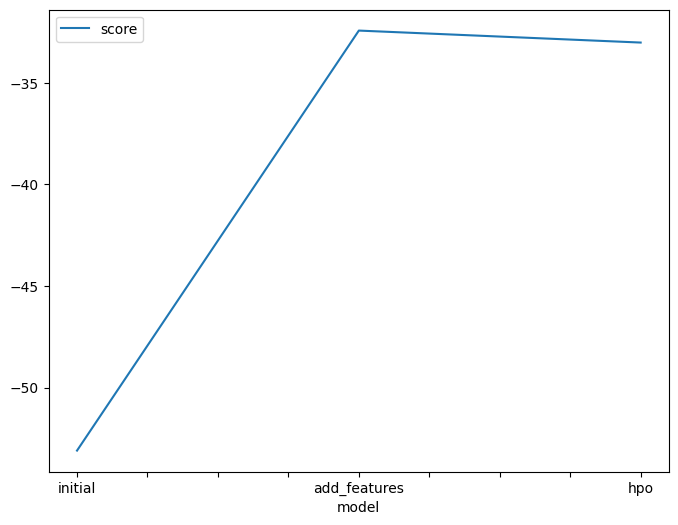

In [40]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
scores=[-53.103401, -32.426006, -33.015749]
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": scores
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

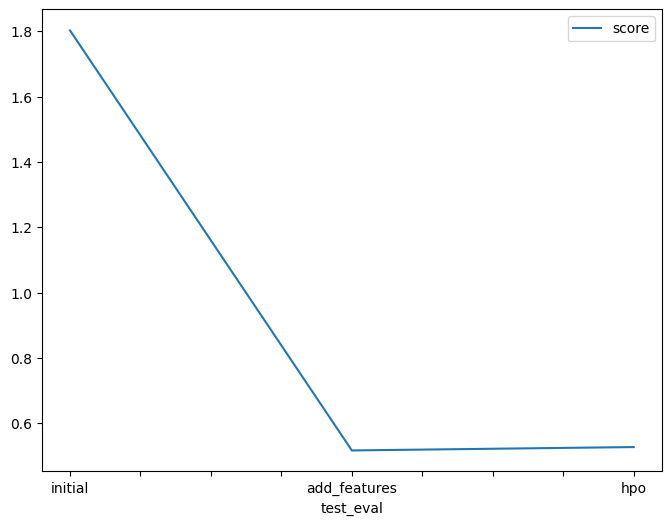

In [41]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80223, 0.51683, 0.52717]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [43]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [None, None, 'CAT'],
    "hpo2": [None, None, 'XGB'],
    "hpo3": [None, None, 'GBM'],
    "score": [1.80223, 0.51683, 0.52717]
})

,model,hpo1,hpo2,hpo3,score
0,initial,None,None,None,1.80223
1,add_features,None,None,None,0.51683
2,hpo,CAT,XGB,GBM,0.52717
